# Plot Data Distributions

This script plots various distributions for the dataset. This was used to obtain descriptive statistics about the dataset in visual form for presentations or papers.

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)
from common.binning import bin_data

## Get Data

In [2]:
from common.data import get_data
from common.paths import HEALTHY, ADHD

X, Y, demographics, population = get_data(label_path=ADHD)
ages, sexes = demographics['Age'], demographics['Sex']

print(f'X: {X.shape} | Y: {len(Y.keys())} | Age: {ages.shape} | Population: {population}')

X: (373, 34716) | Y: 6 | Age: (373,) | Population: adhd


## Plot Distributions

### Sex

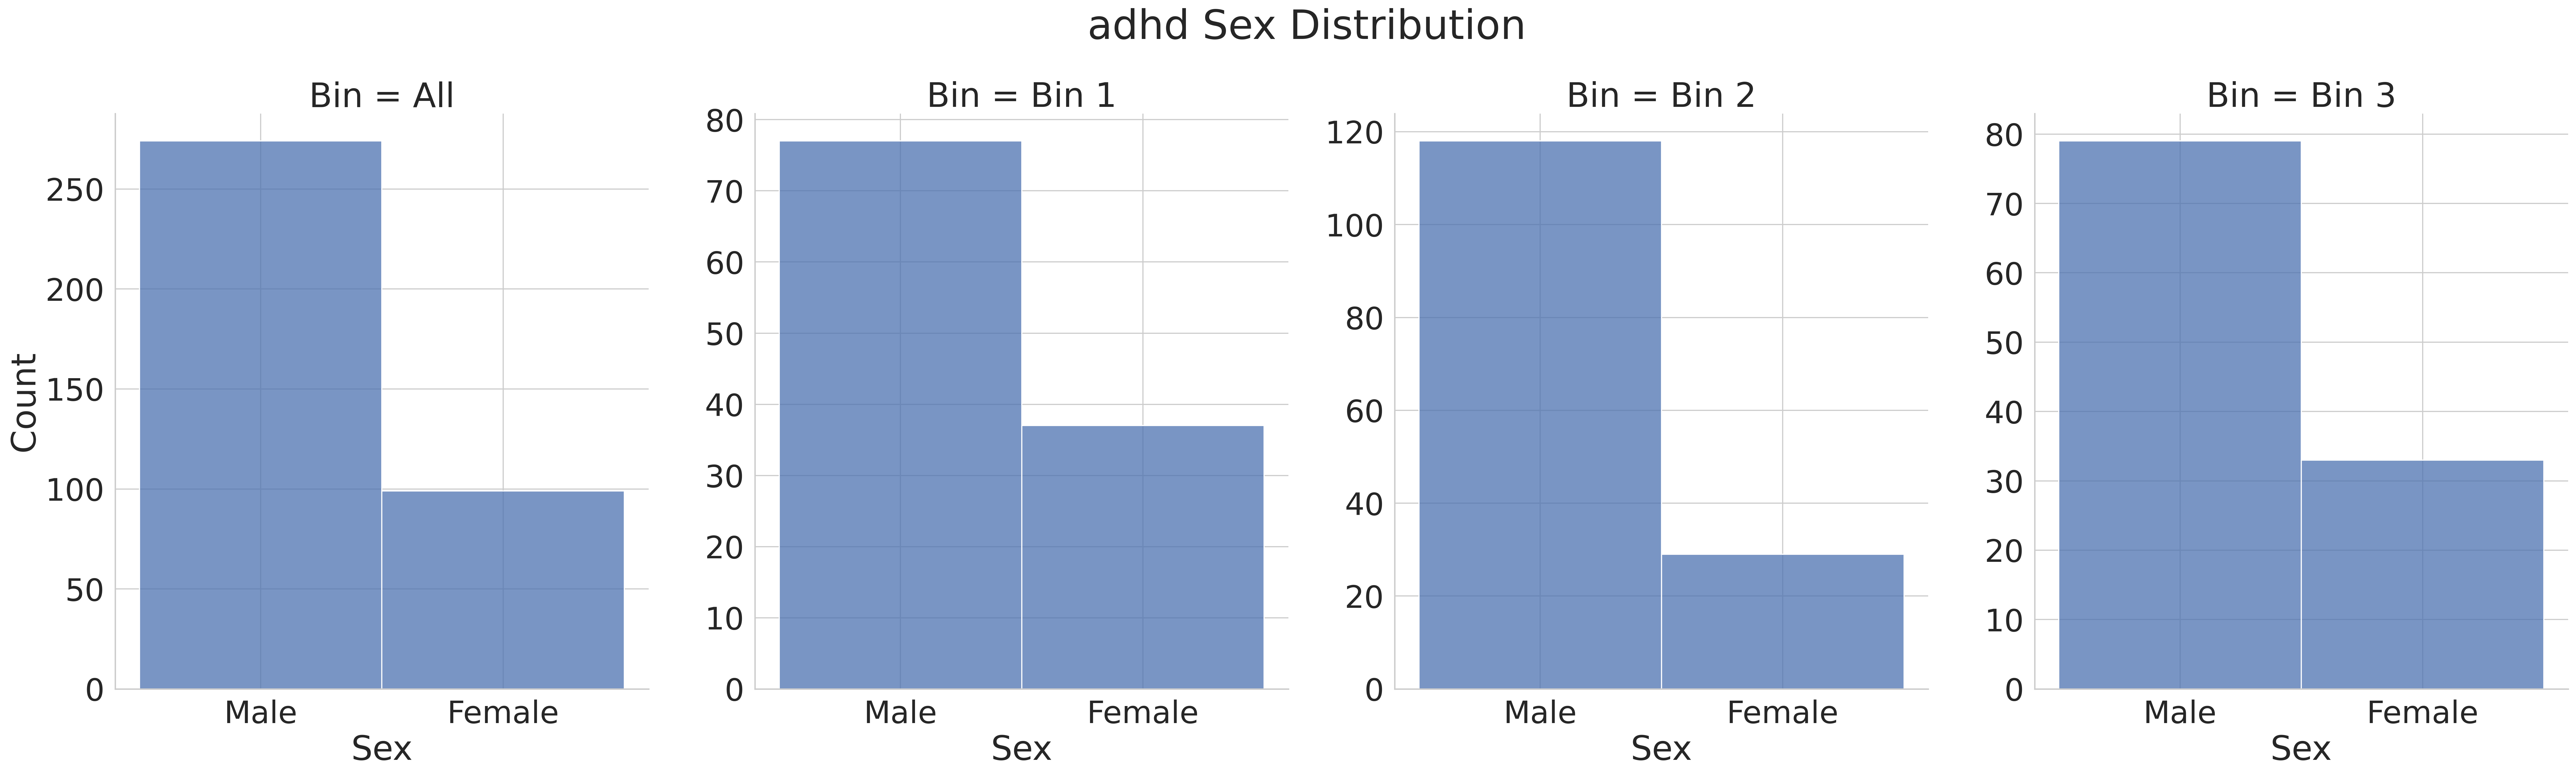

In [20]:
_, bin_sexes, bin_labels = bin_data(X, sexes, ages, True, 3)

sex_data = [{'Sex': sex, 'Bin': bin_label} for sex, bin_label in zip(bin_sexes, bin_labels)]

df = pd.DataFrame(sex_data).explode('Sex')
sex_key = {0: 'Male', 1: 'Female'}
df['Sex'] = df['Sex'].replace(sex_key)
df['Sex'] = pd.Categorical(df['Sex'], ['Male', 'Female'])
# display(df)

with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.FacetGrid(df, col="Bin", sharex=False, sharey=False, height=10, aspect=0.8)
    g.map(sns.histplot, 'Sex', discrete=True)
    g.set_ylabels('Count')
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f"{population} Sex Distribution")

### Age

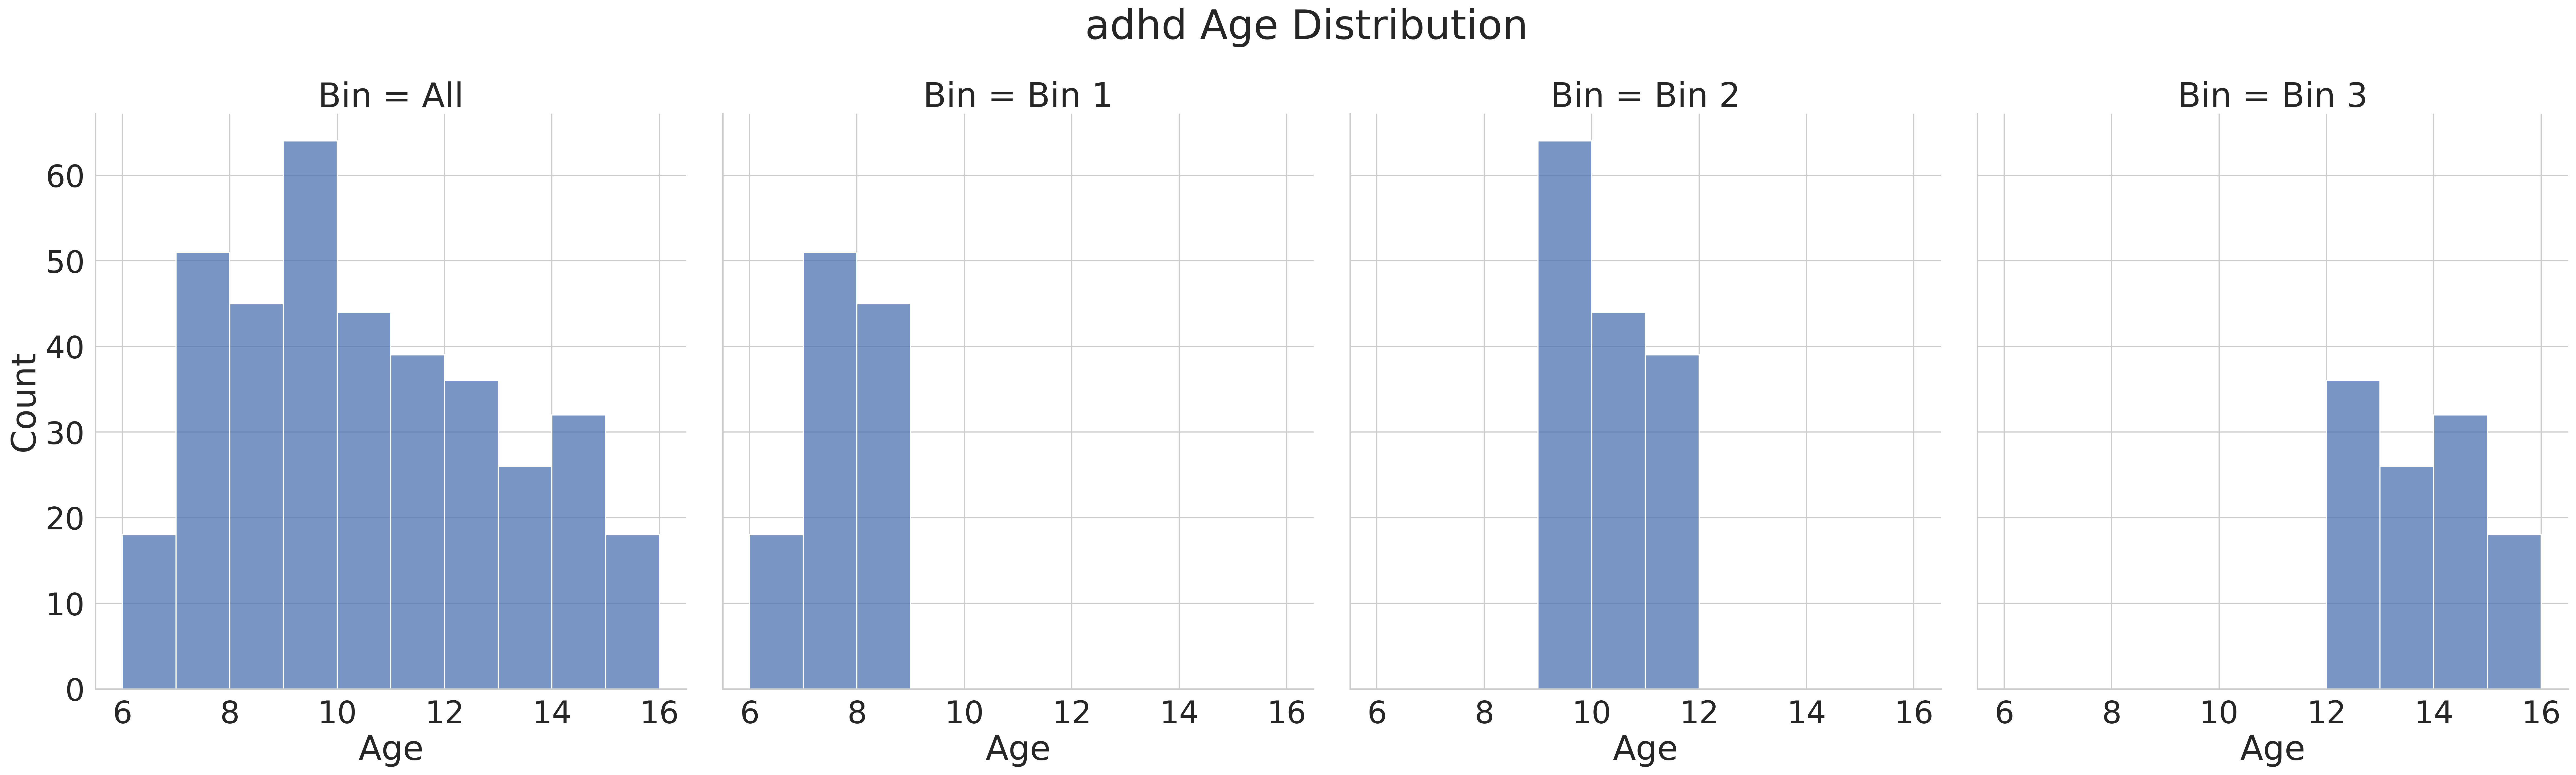

In [36]:
_, bin_ages, bin_labels = bin_data(X, ages, ages, True, 3)

age_data = [{'Age': age, 'Bin': bin_label} for age, bin_label in zip(bin_ages, bin_labels)]

df = pd.DataFrame(age_data).explode('Age')
# display(df)

with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.FacetGrid(df, col="Bin", sharex=False, sharey=True, height=10, aspect=0.8)
    g.map(sns.histplot, 'Age', bins=list(range(6, 17)))
    g.set_ylabels('Count')
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f"{population} Age Distribution")

### WISC

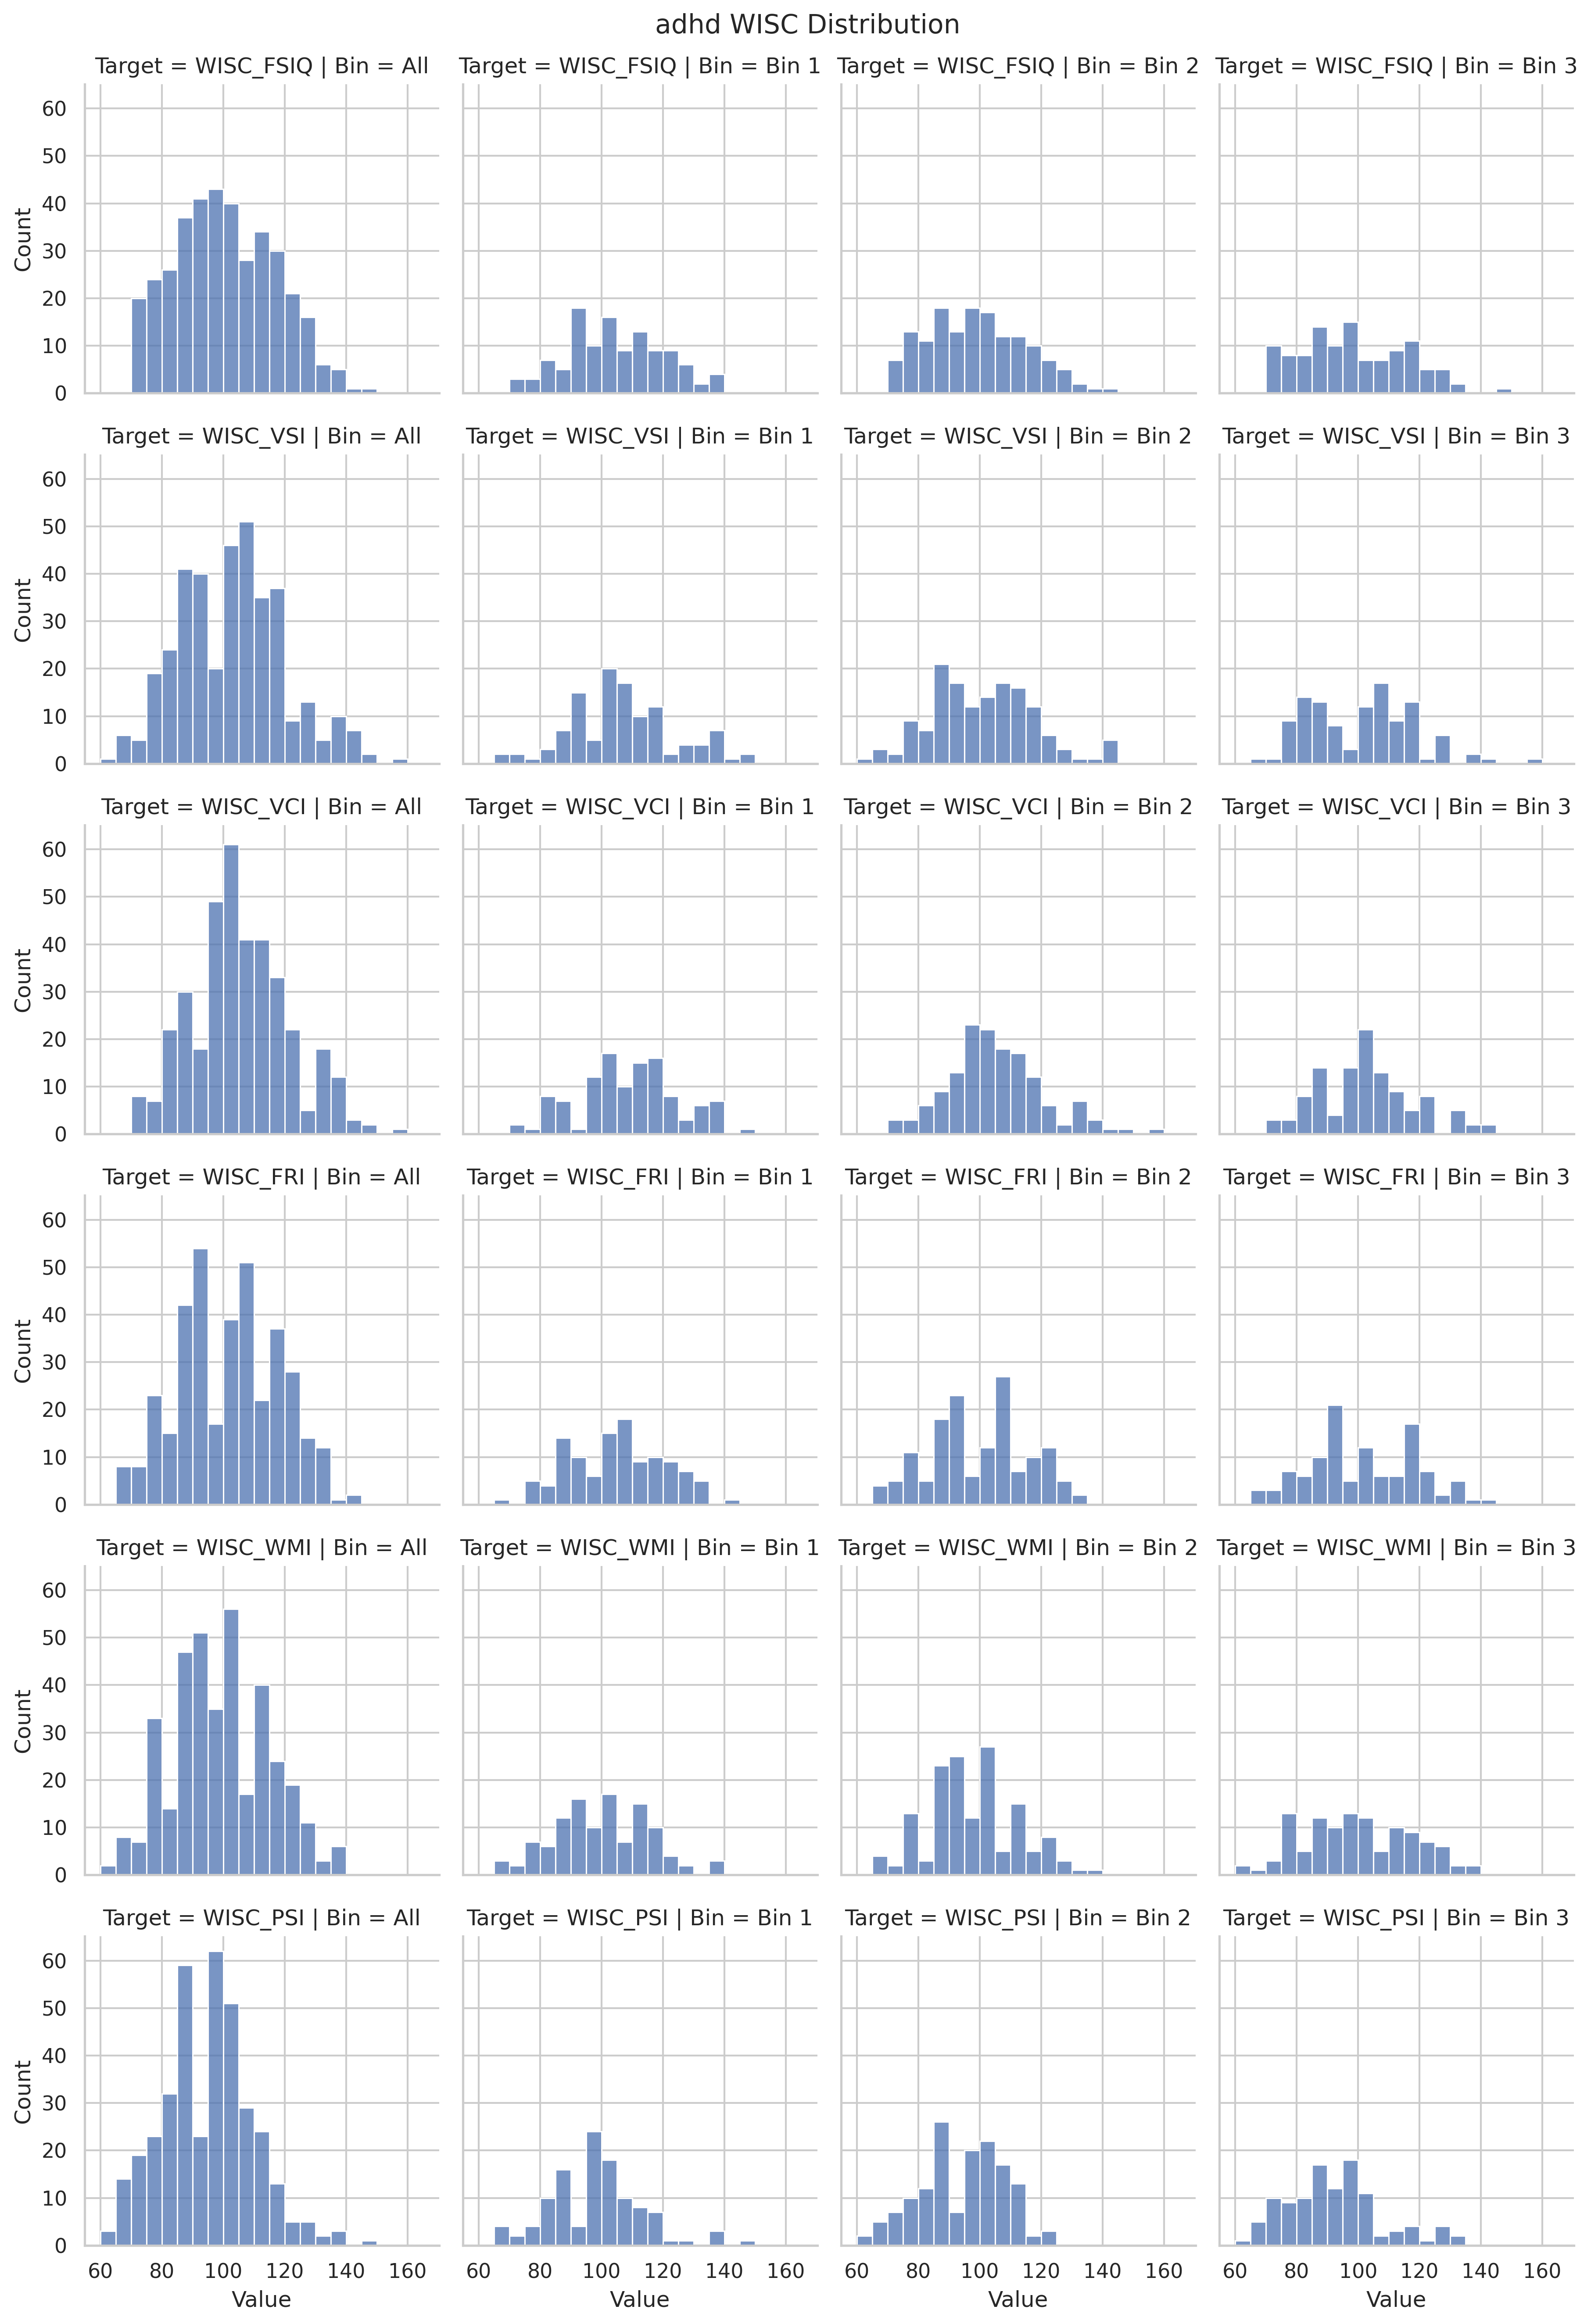

In [47]:
from common.wisc import WISC_LEVEL

all_wisc_data = pd.DataFrame(columns=['Value', 'Bin', 'Target'])

for target in WISC_LEVEL[5]:
    _, bin_target_values, bin_labels = bin_data(X, Y[target], ages, True, 3)

    target_data = [{'Value': target_value, 'Bin': bin_label, 'Target': target} for target_value, bin_label in zip(bin_target_values, bin_labels)]

    df = pd.DataFrame(target_data).explode('Value')
#     display(df)
    all_wisc_data = pd.merge(all_wisc_data, df, how='outer')

with sns.plotting_context("notebook", font_scale=1):
    g = sns.FacetGrid(all_wisc_data, col='Bin', row='Target', sharex=True, sharey=True)
    g.map(sns.histplot, 'Value', bins=list(range(60, 170, 5)))
    g.set_ylabels('Count')
    g.fig.subplots_adjust(top=0.95)
    g.fig.suptitle(f"{population} WISC Distribution")